# **GCN Kipf Tf version**

## Environment Setup

In [0]:
# PENDING
!sudo apt-get install libcairo2-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc
The following NEW packages will be installed:
  libcairo-script-interpreter2 libcairo2-dev libpixman-1-dev libxcb-shm0-dev
0 upgraded, 4 newly installed, 0 to remove and 13 not upgraded.
Need to get 930 kB of archives.
After this operation, 3,985 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libcairo-script-interpreter2 amd64 1.15.10-2 [53.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libpixman-1-dev amd64 0.34.0-2 [244 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxcb-shm0-dev amd64 1.13-1 [6,676 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libcairo2-dev amd64 1.15.10-2 [626 kB]
Fetched 930 kB in 0s (8,186 kB/s)
debconf: unable to initializ

**Cairo lib for plotting**

In [0]:
!sudo pip install cairocffi

    100% |████████████████████████████████| 92kB 5.5MB/s 
  Running setup.py bdist_wheel for cairocffi ... - \ done
  Stored in directory: /root/.cache/pip/wheels/3a/2e/92/89e9dcce600a1a78bebe571fdd096669cba354b29c5e1140b9
Successfully built cairocffi


In [0]:
!pip install pycairo networkx
#!pip install cairocffi networkx

    100% |████████████████████████████████| 204kB 25.6MB/s 
  Running setup.py bdist_wheel for pycairo ... - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /root/.cache/pip/wheels/e6/bb/aa/7b71758ea95e5ae6f1aef55bbc34cc4dd236383dc6554af0c5
Successfully built pycairo


**igraph for Python**

In [0]:
!pip install python-igraph 

    100% |████████████████████████████████| 378kB 26.4MB/s 
  Running setup.py bdist_wheel for python-igraph ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 

##  **Download code from github repo**

In [0]:
!rm -r ./csn-project
!rm ./*.py
!rm ./*.pyc

rm: cannot remove './csn-project': No such file or directory
rm: cannot remove './*.py': No such file or directory
rm: cannot remove './*.pyc': No such file or directory


In [0]:
#from getpass import getpass
#import os

#user = getpass('Github user')
#password = getpass('Github password')
#os.environ['GIT_AUTH'] = user + ':' + password
#!git clone https://$GIT_AUTH@github.com/presmerats/csn-project.git
!git clone https://github.com/presmerats/csn-project.git
!ls -la

Cloning into 'csn-project'...
remote: Enumerating objects: 254, done.
remote: Counting objects: 100% (254/254), done.
remote: Compressing objects: 100% (175/175), done.
remote: Total 254 (delta 83), reused 232 (delta 64), pack-reused 0
Receiving objects: 100% (254/254), 7.26 MiB | 11.15 MiB/s, done.
Resolving deltas: 100% (83/83), done.
total 20
drwxr-xr-x 1 root root 4096 Jan 22 18:59 .
drwxr-xr-x 1 root root 4096 Jan 22 18:54 ..
drwxr-xr-x 1 root root 4096 Jan  8 17:14 .config
drwxr-xr-x 5 root root 4096 Jan 22 18:59 csn-project
drwxr-xr-x 1 root root 4096 Jan  8 17:15 sample_data


In [0]:
!cp -r ./csn-project/src/gcn/gcn_mod/gcn/* .


In [0]:
!ls

 csn-project	       layers.py
 data		       metrics.py
 embedding	       models.py
 embedding_labels     'PageRank Embedding Experiment.ipynb'
 gcn_tests_input.py    __pycache__
 index.html	       sample_data
 __init__.py	      'Tf Tutorial Traffic Signs.ipynb'
 inits.py	       train.py
 InputTest-py2.ipynb   utils.py
 InputTest-Py3.ipynb   utils.pyc


## Generating a graph and training a GCN

### Prepare graph files functions

In [0]:
# local python tests
from pprint import pprint
from igraph import *
import igraph.test
import pickle
import os
import numpy as np
from scipy.sparse import csr_matrix
import collections
import copy
from random import randint


def pickleToDisk(myobj, filepath):
    pickle.dump(myobj, open(filepath, "wb"))


def printGraphObject(filepath):


    myobject = os.path.basename(filepath)
    print("\n\n*************** "+myobject+" ********************")
    y = pickle.load(open(filepath,'rb'))
    print(type(y))
    if type(y) ==  type([]) or type(y) == type(np.ndarray([])):
        
        print(len(y))
        pprint(y[:min(3,len(y)-1)])
    elif type(y) == type({}) or type(y)==type(collections.defaultdict()):
        pprint(y.keys()[:min(3,len(y)-1)])
        pprint(y[y.keys()[0]])
        pprint(y[y.keys()[1]])
        pprint(y[y.keys()[20]])
        pprint(y[y.keys()[3000]])

    else:
        
        pprint(y.shape)
        pprint(y[0,:min(3,y.shape[1]-1)].toarray())
        pprint(y[0,0].shape)
        pprint(type(y[0,0]))
        pprint(y[0,0])

def readListFile(filepath):
    myobject = os.path.basename(filepath)
    print("\n\n*************** "+myobject+" ********************")
    

    testInstances =[]
    with open(filepath, 'rb') as f:
        for line in f.readlines():
            testInstances.append(int(line))

    pprint(testInstances[:min(3,len(testInstances)-1)])


def inspectData():

    printGraphObject('../gcn/gcn/gcn/data/ind.citeseer.y')
    printGraphObject('../gcn/gcn/gcn/data/ind.citeseer.ty')
    printGraphObject('../gcn/gcn/gcn/data/ind.citeseer.x')
    printGraphObject('../gcn/gcn/gcn/data/ind.citeseer.tx')
    printGraphObject('../gcn/gcn/gcn/data/ind.citeseer.graph')
    readListFile('../gcn/gcn/gcn/data/ind.citeseer.test.index')
    printGraphObject('../gcn/gcn/gcn/data/ind.citeseer.allx')
    printGraphObject('../gcn/gcn/gcn/data/ind.citeseer.ally')


def discretize(elements):
    """ create a binary array for each of the 10 ranges of values between 0 and 1"""
    orig = np.array(elements)
    results = []
    
    themax = np.amax(orig)
    themin = np.amin(orig)
    step = (themax - themin )/ 40.0
    
    for i in range(10):
        print(i) 
        if i<9:
            print(orig)
            print(themin + step*i)
            print(themin + step*(i+1))
            range1 = np.bitwise_and(orig >= themin + step*i , orig <= themin + step*(i+1))
        else:
            range1 = orig >= themin + step*i
        print(range1)
        results.append(range1) 
        
    result = np.transpose(np.asarray(results))
    print(result.shape)
    pprint(result)
    return result


def generateData(suffix, n_node=1000, n_test=200, n_train=300 ):
    
    #igraph.test.run_tests()

    # generation
    #g = Graph.Tree(127, 2)
    #g = Graph.GRG(100, 0.2)
    #g = Graph.Erdos_Renyi(100, 0.2)
    #g = Graph.Watts_Strogatz(1, 100, 4, 0.5 )
    g = Graph.Barabasi(n_node)
    summary(g)

    # graph metrics
    # pprint(g.degree([2,3,6,99]))
    # pprint(g.edge_betweenness())
    # pprint(g.pagerank())
    #pprint(g.get_adjacency())
    #pprint(dir(g))
    


    # test.index
    testList = [] 
    with open(suffix+'.test.index','wb') as f:
        while len(testList) < n_test:
            j = randint(0, n_node-1)
            #verify it is not alerady there
            try:
                pos = testList.index(j)
            except:
                testList.append(j)
            f.write(str.encode(str(j)+"\n"))


    # adjacency dict (graph)
    i = 0
    A = g.get_adjlist()
    graphAdj = {}
    for node in A:
        graphAdj[i] = node
        i+=1
    pickleToDisk(graphAdj, suffix+".graph")

    
    xFeatures = np.ones(n_node)
    # allx is for labeled and unlabeled training samples
    allx  = copy.deepcopy([xFeatures[i] for i in range(n_node) if i not in testList])
    # x is for labeled training samples only
    x = copy.deepcopy(allx[:-500])
    #tx = copy.deepcopy(xFeatures[range(n_node-n_test, n_node)])
    tx = [xFeatures[i] for i in testList]
    

    
    allx = csr_matrix(allx)
    allx = np.transpose(allx)
    pickleToDisk(allx, suffix+".allx")
    x = csr_matrix(x)
    x = np.transpose(x)
    pickleToDisk(x, suffix+".x")
    tx = csr_matrix(tx)
    tx = np.transpose(tx)
    pickleToDisk(tx, suffix+".tx")

    print(x.shape)
    print(tx.shape)
    print(allx.shape)
    


    # labels (ally,y , ty)
    prs = discretize(g.pagerank())

    

    # labels of x, and empty labels of unlabeled training samples
    prs_all = copy.deepcopy([prs[i] for i in range(n_node) if i not in testList])
    # labels of the labeled training samples
    prs_train = copy.deepcopy(prs_all[:-500])
    prs_test = copy.deepcopy([prs[i] for i in testList])
    #testList.extend(validationList)
    #finalList = testList
    #prs_train = [ prs[i] for i in range(prs.shape[0]) if i not in finalList ]

    ally = np.array(prs_all)
    y = np.array(prs_train)  
    ty = np.array(prs_test)


    pickleToDisk(ally, suffix+".ally")
    pickleToDisk(y, suffix+".y")
    pickleToDisk(ty, suffix+".ty")
    
    print(y.shape)
    print(ty.shape)
    print(ally.shape)
    pprint(ally)
    

    # run training on those files
  
def generateData2(suffix, n_node=1000, n_test=200, n_train=300):
    # generation
    #g = Graph.Tree(127, 2)
    #g = Graph.GRG(100, 0.2)
    #g = Graph.Erdos_Renyi(100, 0.2)
    #g = Graph.Watts_Strogatz(1, 100, 4, 0.5 )
    g = Graph.Barabasi(n_node)
    g2 = Graph.Watts_Strogatz(1, n_node, 4, 0.5 )
    total_node = 2*n_node
    # graph metrics
    # pprint(g.degree([2,3,6,99]))
    # pprint(g.edge_betweenness())
    # pprint(g.pagerank())
    #pprint(g.get_adjacency())
    #pprint(dir(g))
    


    # test.index
    testList = [] 
    
    while len(testList) < n_test:
        j = randint(n_node, total_node-1)
        #verify it is not alerady there
        try:
            pos = testList.index(j)
        except:
            testList.append(j)
            #f.write(str.encode(str(j)+"\n"))
    with open(suffix+'.test.index','wb') as f:
        for i in testList:
            f.write(str.encode(str(i)+"\n"))

    # adjacency dict (graph)
    i = 0
    A = g.get_adjlist()
    graphAdj = {}
    for node in A:
        graphAdj[i] = node
        i+=1
    A = g2.get_adjlist()
    for node in A:
        graphAdj[i] = node
        i+=1
    pickleToDisk(graphAdj, suffix+".graph")

    
    xFeatures = np.ones(total_node)
    # allx is for labeled and unlabeled training samples
    allx  = copy.deepcopy([xFeatures[i] for i in range(total_node) if i not in testList])
    # x is for labeled training samples only
    x = copy.deepcopy(allx[:n_train])
    #tx = copy.deepcopy(xFeatures[range(n_node-n_test, n_node)])
    tx = [xFeatures[i] for i in testList]
    

    
    allx = csr_matrix(allx)
    allx = np.transpose(allx)
    pickleToDisk(allx, suffix+".allx")
    x = csr_matrix(x)
    x = np.transpose(x)
    pickleToDisk(x, suffix+".x")
    tx = csr_matrix(tx)
    tx = np.transpose(tx)
    pickleToDisk(tx, suffix+".tx")

    print(x.shape)
    print(tx.shape)
    print(allx.shape)
    


    # labels (ally,y , ty)
    aux = g.pagerank()
    aux = aux + g2.pagerank()
    prs = discretize(aux)

    

    # labels of x, and empty labels of unlabeled training samples
    prs_all = copy.deepcopy([prs[i] for i in range(total_node) if i not in testList])
    # labels of the labeled training samples
    prs_train = copy.deepcopy(prs_all[:n_train])
    prs_test = copy.deepcopy([prs[i] for i in testList])
    #testList.extend(validationList)
    #finalList = testList
    #prs_train = [ prs[i] for i in range(prs.shape[0]) if i not in finalList ]

    ally = np.array(prs_all)
    y = np.array(prs_train)  
    ty = np.array(prs_test)


    pickleToDisk(ally, suffix+".ally")
    pickleToDisk(y, suffix+".y")
    pickleToDisk(ty, suffix+".ty")
    
    print(y.shape)
    print(ty.shape)
    print(ally.shape)
    pprint(ally)

In [0]:

def plot2DEmbedding(filepath, labelspath):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    import matplotlib.lines as mlines
    import matplotlib.cm as cm
    %matplotlib inline

    # read embedding labels file
    labels = np.zeros((1,1))
    with open(labelspath,"r") as f:
        size = len(f.readlines())
        labels = np.zeros((size,1))

    # read embedding file
    with open(filepath,"r") as f:
        size = len(f.readlines())

        
    # read embedding labels file
    embeddings = {}
    with open(labelspath,"r") as f:
        i=0
        for label in f.readlines():
            #print(line)
            vals = label.split()
            label_int = 0
            for j in range(len(vals)):
                label_int += float(vals[j])*j
            labels[i]=int(label_int)
            i=i+1
            
        labels_list = [ lab[0] for lab in labels.tolist()]
        for j in set(labels_list):
            embeddings[j]=np.empty((0,2))
            
        with open(filepath,"r") as f2:
            i = 0
            for line in f2.readlines():
                #print(line)
                lineSplit = line.split()
                d1 = lineSplit[0]
                d2 = lineSplit[1]
                key = int(labels_list[i])
                embedding = embeddings[key]
                
                embeddings[key] = np.append(embedding, [[float(d1), float(d2)]], axis=0)
                #embedding[i,0]=float(d1)
                #embedding[i,1]=float(d2)
                i=i+1
        
        # separate embedding by label
        
        plt.subplot(1, 2, 1)
        color_labels = [int(k % 23) for k in set(labels_list) ]
        colors = cm.rainbow(np.linspace(0, 1, len(color_labels)))
        for colref,col in zip(colors, color_labels) :
            #print(col)
            #print([[col]*embeddings[col].shape[0]])
            #print(embeddings[col].shape[0])
            plt.scatter(embeddings[col][:,0], embeddings[col][:,1], c=[colref]*embeddings[col].shape[0], label=str(col))
        #col=0
        #plt.scatter(embeddings[col][:,0], embeddings[col][:,1], c=str(col), label=str(col))
        plt.suptitle('Embedding')
        plt.xlabel('dim 1')
        plt.ylabel('dim 2')
        plt.legend()
        
        
        # histogram of labels
        plt.subplot(1, 2, 2)
        plt.hist(labels_list,bins=list(set(labels_list)), color='blue')
        plt.xlabel('classes')
        plt.ylabel('counts')
        plt.subplots_adjust(wspace=0.5)
        
        plt.show()
        
   

### Prepare graph files

In [0]:
generateData(suffix="ind.t3",n_node=4000, n_train=700, n_test=300)
!mv ind.* ./data/


IGRAPH U--- 4000 3999 -- 
(3200, 1)
(300, 1)
(3700, 1)
0
[0.00236378 0.01208523 0.00116741 ... 0.00013411 0.00014657 0.00012794]
0.00012121738168149547
0.00042031760505756944
[False False False ...  True  True  True]
1
[0.00236378 0.01208523 0.00116741 ... 0.00013411 0.00014657 0.00012794]
0.00042031760505756944
0.0007194178284336435
[False False False ... False False False]
2
[0.00236378 0.01208523 0.00116741 ... 0.00013411 0.00014657 0.00012794]
0.0007194178284336435
0.0010185180518097175
[False False False ... False False False]
3
[0.00236378 0.01208523 0.00116741 ... 0.00013411 0.00014657 0.00012794]
0.0010185180518097175
0.0013176182751857915
[False False  True ... False False False]
4
[0.00236378 0.01208523 0.00116741 ... 0.00013411 0.00014657 0.00012794]
0.0013176182751857915
0.0016167184985618655
[False False False ... False False False]
5
[0.00236378 0.01208523 0.00116741 ... 0.00013411 0.00014657 0.00012794]
0.0016167184985618655
0.0019158187219379395
[False False False ... F

### Training GCN on this graph


### train.py code with modifications
Output:
* model. output from test
* model. output from training
* model.embedding from test (modification of the gcn)
* model.embedding from training (modification of the gcn)


In [0]:
from __future__ import division
from __future__ import print_function

import time
import tensorflow as tf

from utils import *
from models import GCN, GCN2,  MLP

from pprint import pprint 
    
def mytrain(mydataset, printEmbeddingModif, network):
    
    

    def del_all_flags(FLAGS):
        flags_dict = FLAGS._flags()    
        keys_list = [keys for keys in flags_dict]    
        for keys in keys_list:
            FLAGS.__delattr__(keys)

    del_all_flags(tf.flags.FLAGS)


    # Set random seed
    seed = 123
    np.random.seed(seed)
    tf.set_random_seed(seed)

    # Settings
    flags = tf.app.flags
    FLAGS = flags.FLAGS
    flags.DEFINE_string('dataset', mydataset, 'Dataset string.')  # 'cora', 'citeseer', 'pubmed'
    flags.DEFINE_string('model', network, 'Model string.')  # 'gcn', 'gcn2', gcn_cheby', 'dense'
    flags.DEFINE_float('learning_rate', 0.01, 'Initial learning rate.')
    flags.DEFINE_integer('epochs', 200, 'Number of epochs to train.')
    flags.DEFINE_integer('hidden1', 16, 'Number of units in hidden layer 1.')
    flags.DEFINE_float('dropout', 0.5, 'Dropout rate (1 - keep probability).')
    flags.DEFINE_float('weight_decay', 5e-4, 'Weight for L2 loss on embedding matrix.')
    flags.DEFINE_integer('early_stopping', 10, 'Tolerance for early stopping (# of epochs).')
    flags.DEFINE_integer('max_degree', 3, 'Maximum Chebyshev polynomial degree.')
    tf.app.flags.DEFINE_string('f', '', 'kernel')

    #dataset =  mydataset
    #model = 'gcn2'  # 'gcn', 'gcn_cheby', 'dense'
    #learning_rate =  0.01
    #epochs =  200
    #hidden1 = 16
    #dropout = 0.5
    #weight_decay =  5e-4
    #early_stopping =  10
    #max_degree =  3

    # Load data
    adj, features, y_train, y_val, y_test, train_mask, val_mask, test_mask = load_data(mydataset)

    # Some preprocessing
    features = preprocess_features(features)
    """Row-normalize feature matrix and convert to tuple representation"""
    
    if FLAGS.model == 'gcn':
        support = [preprocess_adj(adj)]
        num_supports = 1
        model_func = GCN
    elif FLAGS.model == 'gcn2':
        support = [preprocess_adj(adj)]
        num_supports = 1
        model_func = GCN2
    elif FLAGS.model == 'gcn_cheby':
        support = chebyshev_polynomials(adj, FLAGS.max_degree)
        num_supports = 1 + FLAGS.max_degree
        model_func = GCN
    elif FLAGS.model == 'dense':
        support = [preprocess_adj(adj)]  # Not used
        num_supports = 1
        model_func = MLP
    else:
        raise ValueError('Invalid argument for model: ' + str(FLAGS.model))

    # Define placeholders
    placeholders = {
        'support': [tf.sparse_placeholder(tf.float32) for _ in range(num_supports)],
        'features': tf.sparse_placeholder(tf.float32, shape=tf.constant(features[2], dtype=tf.int64)),
        'labels': tf.placeholder(tf.float32, shape=(None, y_train.shape[1])),
        'labels_mask': tf.placeholder(tf.int32),
        'dropout': tf.placeholder_with_default(0., shape=()),
        'num_features_nonzero': tf.placeholder(tf.int32)  # helper variable for sparse dropout
    }

    # Create model
    model = model_func(placeholders, input_dim=features[2][1], logging=True)


    # Initialize session
    sess = tf.Session()

    # result variables
    global result_embedding

    # Define model evaluation function
    def evaluate(features, support, labels, mask, placeholders):
        t_test = time.time()
        feed_dict_val = construct_feed_dict(features, support, labels, mask, placeholders)
        
        outs_val = []
        global result_embedding
        global printEmbedding
        if printEmbedding == "result_test":
            outs_val = sess.run([model.loss, model.accuracy, model.outputs, model.vars], feed_dict=feed_dict_val)
            result_embedding = outs_val[2]
            #print(outs_val[4])
        elif printEmbedding == "modification_test":
            outs_val = sess.run([model.loss, model.accuracy, model.outputs, model.embedding, model.vars], feed_dict=feed_dict_val)
            result_embedding = outs_val[3]
        else:
            outs_val = sess.run([model.loss, model.accuracy, model.outputs, model.vars], feed_dict=feed_dict_val)
            

        return outs_val[0], outs_val[1], (time.time() - t_test)


    # Init variables
    sess.run(tf.global_variables_initializer())

    cost_val = []

    # Train model
    for epoch in range(FLAGS.epochs):
        t = time.time()
        # Construct feed dictionary
        feed_dict = construct_feed_dict(features, support, y_train, train_mask, placeholders)
        feed_dict.update({placeholders['dropout']: FLAGS.dropout})

        #print(feed_dict)
        # Training step

        outs = []
        if printEmbedding == "result_train":
            outs = sess.run([model.opt_op, model.loss, model.accuracy, model.outputs], feed_dict=feed_dict)
            result_embedding = outs[3]
        elif printEmbedding == "modification_train":
            outs = sess.run([model.opt_op, model.loss, model.accuracy, model.outputs, model.embedding], feed_dict=feed_dict)
            result_embedding = outs[4]
        else:
            outs = sess.run([model.opt_op, model.loss, model.accuracy, model.outputs], feed_dict=feed_dict)
            

        # Validation
        cost, acc, duration = evaluate(features, support, y_val, val_mask, placeholders)
        cost_val.append(cost)

        # Print results
        if epoch % 50 == 0:
            print("Epoch:", '%04d' % (epoch + 1), "train_loss=", "{:.5f}".format(outs[1]),
              "train_acc=", "{:.5f}".format(outs[2]), "val_loss=", "{:.5f}".format(cost),
              "val_acc=", "{:.5f}".format(acc), "time=", "{:.5f}".format(time.time() - t))

        if epoch > FLAGS.early_stopping and cost_val[-1] > np.mean(cost_val[-(FLAGS.early_stopping+1):-1]):
            print("Early stopping...")
            break

    print("Optimization Finished!")

    # Testing
    test_cost, test_acc, test_duration = evaluate(features, support, y_test, test_mask, placeholders)
    print("Test set results:", "cost=", "{:.5f}".format(test_cost),
          "accuracy=", "{:.5f}".format(test_acc), "time=", "{:.5f}".format(test_duration))



    def writeEmbeddingToDisk(result_embedding, labels, mask):
        #pprint(result_embedding)

        with open("embedding","w") as f:
            count = 0
            for elem in result_embedding:

                for e in elem:
                    f.write(str(e))
                    f.write(" ")

                f.write("\n")
                count += 1
            
        with open("embedding_labels","w") as f:
            for elem in labels:

                for e in elem:
                    f.write(str(e))
                    f.write(" ")

                f.write("\n")

    writeEmbeddingToDisk(result_embedding, y_test, test_mask)

### train.py results

#### Experiment: output embedding  

The GCN network has a last layer with as mani units as labels/classes the target can have. This outputs are used in the softmax computation to decide the class. We extract those values before the softmax computation. Basically, this is the embedding that the GCN is computing. This embedding is optimized to have as many dimensions as classes the target can have.

We show the resulting embedding with the values extracted from the training and later from the testing dataset.


len(y): 140
labels shape:
(2708, 7)
len(idx_train) 140
len(idx_val) 500
len(idx_test) 1000
Epoch: 0001 train_loss= 1.95406 train_acc= 0.13571 val_loss= 1.94949 val_acc= 0.36000 time= 0.35764
Epoch: 0051 train_loss= 1.37194 train_acc= 0.83571 val_loss= 1.60018 val_acc= 0.75400 time= 0.03328
Epoch: 0101 train_loss= 0.89020 train_acc= 0.92857 val_loss= 1.28638 val_acc= 0.80200 time= 0.03756
Epoch: 0151 train_loss= 0.69855 train_acc= 0.97143 val_loss= 1.14358 val_acc= 0.79200 time= 0.04146
Optimization Finished!
Test set results: cost= 1.01775 accuracy= 0.81900 time= 0.02634


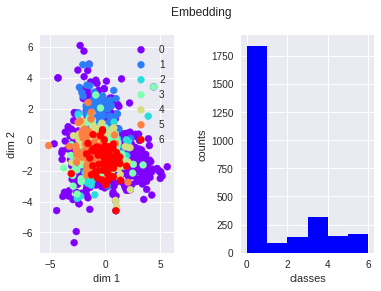

-1.2229844 -0.5873866 -1.2464259 3.0763156 0.82525754 -1.6185627 -1.6686032 
-1.5846869 -0.062884405 -1.2516755 -1.3893322 2.4340835 0.22444254 -2.9097261 
-0.7584899 -1.0336748 -1.356188 0.36021525 1.9467452 -0.89017123 -2.9825988 
1.4914434 -0.8147376 1.0307419 -0.937256 -0.1691544 -0.90700793 -0.5274707 
-1.0578581 -0.30353177 0.3959809 0.83994627 -0.66093624 -0.57803774 -1.9720855 
-1.1241167 -1.9359748 1.8381685 -0.6886954 -1.1839195 -0.29947782 -1.6913953 
2.8278742 -0.6487229 0.31273252 -0.05875264 -0.7253766 -1.8193429 -1.6189976 
2.5136294 -1.428425 -2.0506034 1.9501373 1.3583612 -1.5675211 -1.7705953 
-0.43696782 -0.7498271 1.7136335e-05 1.7842519 -1.1148859 -0.9478092 -1.5501037 
-2.367876 -4.139574 4.1988616 -0.6748329 -3.3001573 -0.733629 -1.8048666 


In [155]:
mydataset="cora"
printEmbedding = "result_train" # "result_train" "result_test" "modification_train" " modification_test"
mytrain(mydataset, printEmbedding, network='gcn')
plot2DEmbedding("embedding","embedding_labels")
!head ./embedding


len(y): 140
labels shape:
(2708, 7)
len(idx_train) 140
len(idx_val) 500
len(idx_test) 1000
Epoch: 0001 train_loss= 1.95367 train_acc= 0.14286 val_loss= 1.95043 val_acc= 0.31400 time= 0.35115
Epoch: 0051 train_loss= 1.32031 train_acc= 0.87857 val_loss= 1.66394 val_acc= 0.71800 time= 0.03462
Epoch: 0101 train_loss= 0.85302 train_acc= 0.95000 val_loss= 1.32124 val_acc= 0.79000 time= 0.03880
Epoch: 0151 train_loss= 0.73921 train_acc= 0.93571 val_loss= 1.16544 val_acc= 0.78400 time= 0.03434
Optimization Finished!
Test set results: cost= 1.02718 accuracy= 0.81400 time= 0.02769


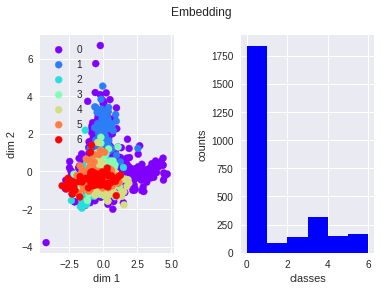

-0.9901217 -0.4440422 -0.61710787 3.568172 -0.37448168 -1.5405627 -1.0764587 
0.27882275 -0.90072185 -0.3963626 -0.82714355 4.2022195 -2.363381 -0.404191 
0.0871855 -0.8431799 -0.3931434 0.5368236 3.1200461 -2.4968176 -0.77415043 
3.9004712 -0.058711834 -1.3016859 -0.7843592 -0.081725694 -1.7392418 -1.8651125 
-0.78073585 -0.73276144 -0.19383246 2.0989566 -0.3344005 -1.1477451 -0.58860826 
-0.8005869 -0.92458963 3.1363173 -1.2628515 -0.562976 -1.6590149 -1.4201376 
2.4093428 -0.071483105 -0.58828545 -0.3897509 -0.20345981 -1.205401 -1.4599359 
-0.915315 -0.7061206 -0.8556427 4.5436068 -0.99199706 -1.2583698 -1.5721928 
-0.53831625 -0.60269624 -0.07707283 2.4166527 -0.3629625 -1.075829 -1.1361754 
-2.1185114 -1.613065 3.970171 -1.8412335 -1.1133223 -0.83281004 -0.4498076 


In [156]:
mydataset="cora"
printEmbedding = "result_test" # "result_train" "result_test" "modification_train" " modification_test"
mytrain(mydataset, printEmbedding, network='gcn')
plot2DEmbedding("embedding","embedding_labels")
!head ./embedding

#### Experiment: 2 unit layer embedding  

We add a 2 unit layer after the first 2 GCN layers, and a  in order to have a 2 dimension embedding. We add after that 2nd embedding layer, a 6 unit output layer  as it will be necessary for the training to used the 6 possible target labels. In summary, the GCN has been augmented with a 2 unit layer and a 6 unit layer, the training is based on the output of the last 6 units layer but we extract also the values of the 2 unit layer in order to see a 2 dimension embedding trained with the data.

We show the result of the embedding with the training data and later with the testing data.


len(y): 140
labels shape:
(2708, 7)
len(idx_train) 140
len(idx_val) 500
len(idx_test) 1000
Epoch: 0001 train_loss= 1.95370 train_acc= 0.06429 val_loss= 1.95027 val_acc= 0.34000 time= 0.33882
Epoch: 0051 train_loss= 1.27582 train_acc= 0.45714 val_loss= 1.49299 val_acc= 0.44600 time= 0.03162
Early stopping...
Optimization Finished!
Test set results: cost= 1.16521 accuracy= 0.68900 time= 0.02207


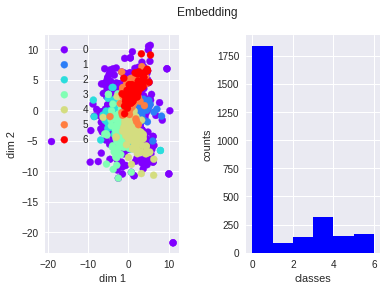

-3.0989983 -4.30705 
2.8319666 0.8490275 
0.31825712 -3.664248 
-4.7285986 5.904292 
-1.9485499 -4.440044 
-4.643675 -1.5445495 
-2.8013644 1.8278186 
0.81947356 -3.874083 
-2.5594933 -3.02136 
-2.7564392 -0.7446099 


In [157]:
mydataset="cora"
printEmbedding = "modification_train" # "result_train" "result_test" "modification_train" " modification_test"
mytrain(mydataset, printEmbedding, network='gcn2')
plot2DEmbedding("embedding","embedding_labels")
!head ./embedding

PageRank em# New Section


len(y): 140
labels shape:
(2708, 7)
len(idx_train) 140
len(idx_val) 500
len(idx_test) 1000
Epoch: 0001 train_loss= 1.95322 train_acc= 0.15000 val_loss= 1.94832 val_acc= 0.24800 time= 0.34065
Epoch: 0051 train_loss= 1.06713 train_acc= 0.57143 val_loss= 1.36955 val_acc= 0.41800 time= 0.03482
Early stopping...
Optimization Finished!
Test set results: cost= 1.21362 accuracy= 0.58000 time= 0.02718


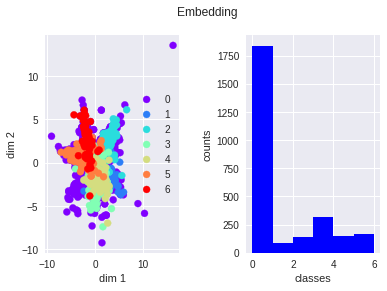

-0.3011194 -3.2915723 
1.5796647 -1.5156155 
1.4819946 -1.8602312 
-2.8195186 -3.1034327 
0.047308445 -2.4446037 
3.1924512 2.714775 
-2.0471494 -2.2916794 
-0.6713967 -3.049977 
-0.019603282 -2.0541291 
3.1696277 4.123169 


In [158]:
mydataset="cora"
printEmbedding = "modification_test" # "result_train" "result_test" "modification_train" " modification_test"
mytrain(mydataset, printEmbedding, network='gcn2')
plot2DEmbedding("embedding","embedding_labels")
!head ./embedding

#### Experiment: embedding for new graph

In [0]:
genera